# Examen ordinario 2017

## Producto escalar y producto vectorial

*Define una función `escalar` y otra función `vectorial` que implementan el producto escalar y vectorial de dos vectores respectivamente.*

*Cada vector se representa como una tupla de tres coordenadas cartesianas.*

In [1]:
def escalar(a,b):
    return sum(ai*bi for ai,bi in zip(a,b))

def vectorial(a,b):
    return (a[1]*b[2]-a[2]*b[1],
            a[2]*b[0]-a[0]*b[2],
            a[0]*b[1]-a[1]*b[0])

He visto intentos de evitar errores utilizando programación dirigida por datos para el producto vectorial.  Creo que en este caso es suficientemente sencillo y estable como para que no se necesite. Si lo consideras necesario podría ser así:

In [2]:
def vectorial(a,b):
    return tuple(a[i]*b[j]-a[j]*b[i] for i,j in ((1,2),(2,0),(0,1)))

## Triángulo de Pascal

*El triángulo de Pascal es un triángulo de números que se construye de la siguiente manera.  Empieza con un 1 en la fila superior.  Cada fila posterior se construye a partir de la inmediata superior, donde el primer y el último número de cada fila son iguales que el primer y último número de la anterior, y cada número entre ellos es la suma de los dos a la izquierda y a la derecha en la fila inmediatamente superior.  La fila enésima tiene n números.  Tiene la siguiente pinta:*

```
      1
     1 1
    1 2 1
   1 3 3 1
  1 4 6 4 1
1 5 10 10 5 1
```

*Define la función `triangulo_pascal` que imprime por salida estándar un triángulo de Pascal con el número de líneas que se indica en su único argumento.*

**Nota: El triángulo debe imprimirse siguiendo escrupulosamente la salida del ejemplo. Los espacios son parte esencial del problema. Nota que los números están separados por un espacio y las líneas están centradas respecto a la de mayor tamaño.**

Como siempre utilizamos una estrategia top-down. Asumimos que los números están calculados y los imprimimos como dice el enunciado.  En esta solución aprovecha el [método `format`](https://docs.python.org/3/library/stdtypes.html#str.format) de las cadenas. La expresión `'{:^30}'.format(s)` es una cadena de 30 caracteres que contiene la cadena `s` centrada y todos los demás caracteres como espacios.  En este caso el ancho de la cadena es el ancho de la última fila, por lo que habrá que calcularlo. 

In [3]:
def triangulo_pascal(n):
    L = [' '.join([str(i) for i in x]) for x in pascal(n)]
    for s in L:
        print(('{:^'+str(len(L[-1]))+'}').format(s))

Por supuesto, también se puede hacer escribiendo los espacios a mano.

In [4]:
def triangulo_pascal(n):
    L = [' '.join([str(i) for i in x]) for x in pascal(n)]
    for s in L:
        espacios = (len(L[-1])-len(s))//2 
        print(' '*espacios + s)

Ya solo queda calcular los números correspondientes a cada línea.

In [5]:
def pascal(n):
    if n == 1: return [[1]]
    L = pascal(n-1)
    return L + [linea_siguiente(L[-1])]

def linea_siguiente(L):
    return [a+b for a,b in zip(L+[0], [0]+L)]

Es todavía mas simple usar un generador para producir los números.

In [6]:
def pascal(n):
    L = [1]
    for i in range(n):
        yield L
        L = linea_siguiente(L)

In [7]:
triangulo_pascal(6)

      1
     1 1
    1 2 1
   1 3 3 1
  1 4 6 4 1
1 5 10 10 5 1


## Date un paseo de 10 minutos

*Vives en la ciudad de Cartesia donde todas las calles están formando una cuadrícula perfecta. Llegas con diez minutos de adelanto a una cita y decides aprovechar la oportunidad para dar un corto paseo. La ciudad proporciona a sus ciudadanos una App para generar paseos de forma automática en sus teléfonos. Cada vez que se pulsa un botón recibes una cadenas donde cada letra representa la dirección a tomar en cada manzana o bloque (e.g. 'nswe'). Sabes que se tarda un minuto en recorrer el ancho de una manzana, así que crea una función `valida_ruta` que reciba como argumento la cadena generada por la App y devuelva True si el paseo de la App tomará exactamente diez minutos (¡no quieres llegar tarde ni demasiado pronto!) y además el paseo termina en el punto de inicio. Devuelve False en caso contrario.*

**Nota: Siempre recibirás una cadena válida que contiene una colección aleatoria de letras (solamente 'n', 's', 'e', o 'w' que corresponden a norte, sur, este y oeste respectivamente). Nunca se proporcionará una lista vacía (¡eso no sería un paseo, sería permanecer de pie!).**

Es desolador comprobar que muy pocos alumnos habían hecho este ejercicio con antelación.  Es uno de los ejercicios incluídos en el cuaderno [Ejercicios similares al exámen](https://github.com/FranciscoMoya/informatica/blob/master/notebooks/ejercicios2.ipynb). Si ni siquiera se han hecho estos ejercicios es completamente normal que los resultados no sean buenos. Para mi esto es un signo de desidia, desinterés y falta de motivación.

Tan solo hay que asegurar que se tarda 10 minutos exactos (10 movimientos en total) y que el destino es el mismo punto origen.

In [8]:
def valida_ruta(s):
    return len(s) == 10 and destino(s) == (0,0)

def destino(s):
    return (sum(1 if i == 'n' else -1 for i in s if i in 'ns'),
            sum(1 if i == 'e' else -1 for i in s if i in 'ew'))

Si te resulta molesta la repetición de `'n'` y `'e'` y la separación entre `'ns'` y `'ew'` también se puede usar la posición.

In [9]:
def destino(s):
    paso = { 'n': (0,1), 's': (0,-1), 'e': (1,0), 'w': (-1,0) }
    return tuple(sum(x) for x in zip(*(paso[c] for c in s)))

## Forma escalonada reducida por filas

*La forma escalonada reducida por filas (RREF, por su traducción inglesa **Reduced Row Echelon Form**) de una matriz es un posible paso intermedio del método de Gauss-Jordan para la inversión de matrices o la resolución de sistemas lineales.*

*Cada fila puede multiplicarse por una constante, restarse a otra fila previamente multiplicada por una constante o intercambiarse por otra fila. El objetivo es generar una matriz que cumple las siguientes propiedades:*

* *Las filas (si las hay) que consistan en todos los elementos iguales a cero se agrupan juntas en la parte inferior de la matriz.*
* *En cada fila que no tenga todos los elementos a cero, el elemento más a la izquierda es un uno, y se denomina pivote.*
* *Cada columna que contenga un pivote (uno inicial) tiene ceros en todos los elementos siguientes.*
* *El pivote de una fila está a la izquierda de cualquier pivote de las filas por debajo de ésta.*

*Define una función `rref` que devuelve una matriz en forma escalonada reducida por filas dada una matriz cualquiera que se pasa como único argumento.*

**Nota: Las matrices se representan como listas de filas donde cada fila se representa como una lista de números. El problema está muy relacionado con el trabajo en grupo y puedes aprovechar el código que hayas desarrollado hasta ahora.**

La mayoría de los alumnos deberían tener ya hecha esta función o una muy parecida para el trabajo en grupo. Algunos alumnos pueden copiarla literalmente, porque la han hecho ellos mismos.  Otros alumnos simplemente tienen que poner las funciones vacías, que deberían entender perfectamente, y rellenar la funcionalidad.

Aplicamos como siempre la estrategia top-down. El problema consiste simplemente en reducir por filas.  Por tanto para cada fila de la matriz debemos reducir las siguientes.

In [10]:
from copy import deepcopy
def rref(M):
    A = deepcopy(M)
    for i in range(len(A)):
        rref_row(A, i)
    return A

La operación que se realiza por cada fila se puede descomponer en tres partes:

1. Encontrar la fila con el pivote más a la izquierda posible.
1. Normalizar la fila para que el pivote sea 1.
1. Escalonar las filas siguientes para que la columna por debajo del pivote sea cero.

In [11]:
def rref_row(A, i):
    pivot = find_row(A, i)
    normalize_row(A[i], pivot)
    echelon_row(A, i, pivot)

Encontrar la fila con el pivote más a la izquierda consiste en buscar el pivote de cada fila desde la que se indica y si está más a la izquierda intercambiar la fila.

In [12]:
def find_row(A, i):
    pivot = len(A[i])
    for j in range(i, len(A)):
        np = find_pivot(A[j])
        if np < pivot:
            A[i], A[j] = A[j], A[i]
            pivot = np
    return pivot

Encontrar el pivote no es más que encontrar la posición del primer elemento distinto de cero.

In [13]:
def find_pivot(L):
    return next(i for i,x in enumerate(L) if x != 0)

Normalizar no es más que dividir por el valor del pivote todos los elementos.

In [14]:
def normalize_row(L, pv):
    for i in range(pv, len(L)):
        L[i] /= L[pv]

Escalonar implicar restar la fila del pivote escalada a todas las filas posteriores al pivote.

In [15]:
def echelon_row(A, i, pv):
    for j in range(i+1, len(A)):
        reduce_row(A[j], A[i], pv)

Restar la fila del pivote consiste en restar los elementos de la fila del pivote escalados por el elemento que ocupa la columna del pivote.

In [16]:
def reduce_row(L, P, pv):
    for i in range(pv, len(P)):
        L[i] -= P[i]*L[pv]

# Recuperación de la prueba de progreso

## Puntos vecinos de uno dado

*Sea una secuencia de puntos en el plano identificados por números entre 1 y **n**.*

*Sea un conjunto de segmentos definido como una secuencia de pares que identifican a los dos puntos que une cada segmento. Por ejemplo, la secuencia `[(1,2),(2,3),(3,1)]` define un triángulo.*

*Define una función `vecinos(L)` que recibe como argumento una lista de segmentos y devuelve un diccionario que a cada punto hace corresponder una lista de los puntos vecinos (existe un segmento que lo conecta con él).  Por ejemplo, para el triángulo anterior debería devolver el diccionario `{1:[2,3], 2:[1,3], 3:[1,2]}`.*

Como siempre utilizamos estrategia top-down. Lo que nos piden es el diccionario de todos los puntos en el que a cada punto se le hace corresponder la lista de sus vecinos.

In [17]:
def vecinos(L):
    return { p:busca_vecinos(L,p) for p in puntos(L) }

Los vecinos de un punto `p` son los puntos que aparecen junto a el en algún arco.  Podemos aprovechar la unión de conjuntos para no repetir puntos, pero luego nos piden que sea una lista.

In [18]:
def busca_vecinos(L,p):
    return list(set(x for x,y in L if y == p) | set(x for y,x in L if y == p))

Todos los puntos se pueden obtener aplanando la lista de segmentos y metiéndolo en un conjunto para eliminar duplicados. Se puede aplanar sumando todas las tuplas de los puntos.

In [19]:
def puntos(L):
    return set(sum(L,tuple()))

## Curva de Batman

*La [curva de Batman](http://www.calculushumor.com/calculus-humor/the-batman-curve) es una curiosa curva que se define con la ayuda de cuatro funciones que se mencionan en el enlace.*

*Definir la función `batman_superior(x)` que devuelve `None` para **x** fuera del intervalo [-7,7] y el punto superior de la curva de Batman si **x** se encuentra en el intervalo [-7,7].*

Este ejercicio solo necesita pasar a Python las expresiones que aparecen en la página. Hay algunos signos de multiplicación que faltan, la exponenciación es con `**` y no con `^` y hay que importar la función `sqrt`.

In [20]:
from math import sqrt

def azul(x):
    return 2*sqrt(-abs(abs(x)-1)*abs(3-abs(x))/((abs(x)-1)*(3-abs(x))))*(1+abs(abs(x)-3)/(abs(x)-3))*sqrt(1-(x/7)**2)+(5+0.97*(abs(x-.5)+abs(x+.5))-3*(abs(x-.75)+abs(x+.75)))*(1+abs(1-abs(x))/(1-abs(x)))

def verde(x):
    return (2.71052+(1.5-.5*abs(x))-1.35526*sqrt(4-(abs(x)-1)**2))*sqrt(abs(abs(x)-1)/(abs(x)-1))+0.9

def batman_superior(x):
    if 1 < abs(x) < 3:
        return verde(x)
    if abs(x) > 7:
        return None
    return azul(x)

Para estar seguros de que lo hemos hecho bien podemos dibujar la gráfica con `pyplot`.

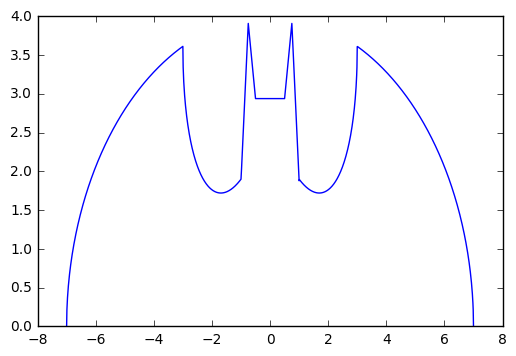

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange
xr = arange(-7, 7.01, 0.01)
plt.plot(xr, [batman_superior(x) for x in xr])

## Fórmula de Ramanujan para π

*Una de las fórmulas más utilizadas para aproximar el valor de pi se la debemos al genial matemático indio Srinivasa Ramanujan.*

<img src="https://i1.wp.com/ucanalytics.com/blogs/wp-content/uploads/2014/01/ramanujan.png">

*Define una función <em class="tt">sr_pi(n)</em> que calcula la aproximación de pi utilizando solo los <em>n</em> primeros términos del sumatorio en la fórmula de Ramanujan.*

Ignoraremos los efectos de la imprecisión de los números reales.

In [22]:
from math import factorial as fact

def inv_pi(n):
    return (2*sqrt(2)/9801)*sum(fact(4*k)*(1103+26390*k)/(fact(k)**4*396**(4*k)) for k in range(n))

def sr_pi(n):
    return 1/inv_pi(n)

Incluso con valores bajos de *n* podemos comprobar que el resultado es excelente.

In [25]:
sr_pi(10)

3.141592653589793

## Puntos alcanzables desde uno dado

*Sea una secuencia de puntos en el plano identificados por números entre 1 y **n**.*

*Sea un conjunto de segmentos definido como una secuencia de pares que identifican a los dos puntos que une cada segmento. Por ejemplo, la secuencia `[(1,2),(2,3),(3,1),(4,5),(5,6),(4,6)]` define dos triángulos.*

*Define una función `alcanzables(L, n)` que recibe como argumento una lista de segmentos y un punto (identificado por un número de 1 a **n**) y devuelve una lista de todos los puntos alcanzables desde el punto que se pasa como argumento. Es decir, todos aquellos puntos para los que existe una secuencia de segmentos que los conecta con el que se pasa como argumento. Por ejemplo, para los triángulos anteriores y el punto 6 debería devolver la lista `[4,5,6]`.*

**Nota: Ten en cuenta que un punto puede ser alcanzable indirectamente a través de otros puntos alcanzables. Si lo estimas conveniente aprovecha el parecido de este problema con el primero.**

Aprovechamos la definición de `vecinos` que tenemos del primer ejercicio. Calculamos los vecinos del punto dado, luego los vecinos de los vecinos, y así sucesivamente hasta que no haya nuevos vecinos. 

In [38]:
def alcanzables(L, p):
    v = vecinos(L)
    ret = nuevos_alcanzables = set(v[p])
    while True:
        nuevos_alcanzables = set(sum([v[x] for x in nuevos_alcanzables], [])) - ret
        if len(nuevos_alcanzables) == 0:
            return list(ret)
        ret |= nuevos_alcanzables

Otra forma sería completar la lista de segmentos con la propiedad transitiva de la alcanzabilidad.

In [ ]:
def alcanzables(L,p):
    A = cerramiento_transitivo(L)
    return list(set(x for x,y in A if y == p) | set(y for x,y in A if x == p))

El cerramiento transitivo no es más que los segmentos ampliados de manera que si aparecen los segmentos `(1,2)` y `(2,3)` se incluya también el segmento `(1,3)`. Se complica un poco porque en el enunciado no dice nada acerca del orden de los puntos en un segmento. Por tanto `(1,3)` y `(3,1)` representan el mismo segmento.

In [40]:
def cerramiento_transitivo(L):
    trans = [(x,z) for (x,y1) in L for (y2,z) in L if y1 == y2] + \
            [(x,z) for (y1,x) in L for (y2,z) in L if y1 == y2] + \
            [(x,z) for (x,y1) in L for (z,y2) in L if y1 == y2] + \
            [(x,z) for (y1,x) in L for (z,y2) in L if y1 == y2]
    if len(trans) == 0:
        return L
    return cerramiento_transitivo(L + trans)